In [1]:
import pandas as pd
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder



In [16]:
import os
from os import environ, path

current_directory = os.getcwd()
print(current_directory) 
df = pd.read_csv('data/historical_data.csv')


c:\Users\julu9\Codes\Machine-learning-projects\DeliveryPredictionModel


In [17]:
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_time_taken'] = df['actual_delivery_time']-df['created_at']
df['date'] = pd.to_datetime(df['actual_delivery_time']).dt.date
df['actual_time_taken'] = df['actual_time_taken']/ pd.offsets.Second(1) ## Transforms it into seconds

In [19]:
cleaned  = df[df['actual_time_taken'] <= df.actual_time_taken.quantile(0.9999)] # removing the outliers
cleaned = cleaned.dropna(
    how='any', 
    subset=[
        'actual_time_taken', 
        'market_id', 
        'store_primary_category',
        'total_onshift_dashers',
        'total_busy_dashers',
        'total_outstanding_orders'
    ],
)

<AxesSubplot:ylabel='Frequency'>

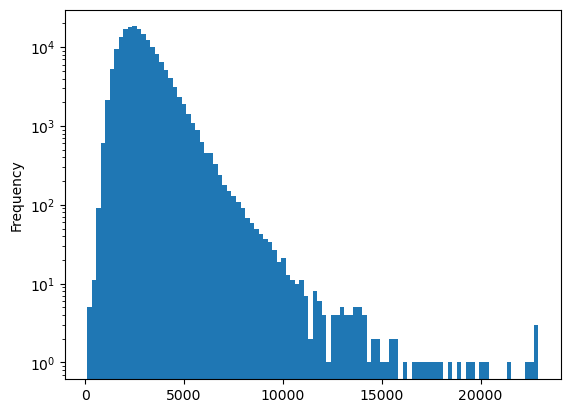

In [20]:
cleaned.actual_time_taken.plot.hist(bins=100, log=True)

In [21]:
integer_columns = [
    'market_id',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
]
for column in integer_columns:
    cleaned[column] = cleaned[column].astype('int32')

In [41]:
numerics = ['total_items',
        'subtotal',
        'num_distinct_items',
        'min_item_price',
        'max_item_price',
        'total_onshift_dashers',
        'total_busy_dashers',   
        'total_outstanding_orders',
        'estimated_order_place_duration',
        'estimated_store_to_consumer_driving_duration']

categorical = ['store_primary_category',
        'market_id',
        'order_protocol',]

calender = [
    'date',
    'created_at',
    'actual_delivery_time',
    'date',
]

numeric_features = cleaned[numerics]
calender_features = cleaned[calender]



In [40]:
# Function to clean features

def clean_categorical (df , columns) :
    categorical_features = df[categorical]
    categorical_features = pd.get_dummies(categorical_features, columns = columns)
    categorical_features
    categorical_features.head()
    return categorical_features


def clean_numeric (df , columns):
    numeric_features = df[columns]
    return numeric_features



### Categorical features 

In [43]:
categorical_features = clean_categorical(cleaned,categorical)
categorical_features


,store_primary_category_afghan,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,store_primary_category_brazilian,...,market_id_4,market_id_5,market_id_6,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
197424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
197425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
197426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


,store_primary_category_afghan,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,store_primary_category_brazilian,...,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0,market_id_1,market_id_2,market_id_3,market_id_4,market_id_5,market_id_6
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


,market_id,store_primary_category_afghan,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,...,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
197424,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
197425,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
197426,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
